# Statistics Assignment-5 (Hypothesis Tests)

In [140]:
# Import pandas, numpy, scip.stats
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EXERCISE 1.

In [141]:
test_score = (12.20-13.20) / (2.5 / np.sqrt(40))
test_score

-2.5298221281347035

In [142]:
p_value = stats.norm.cdf(test_score)
p_value

0.005706018193000826

In [143]:
# α = 0.01
if p_value > 0.01:
    print ("This company can't be accused of paying substandard wages")
else:
    print ("This company can be accused of paying substandard wages")

This company can be accused of paying substandard wages


### EXERCISE 2.

In [144]:
soil = pd.read_csv('soil.csv')
df = soil
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [145]:
leveneTest = stats.levene(df.Soil1.dropna().values, df.Soil2.values)
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [146]:
# we had high p value so that The population variances are equal. equal_var = True as like default

In [147]:
indTest = stats.ttest_ind(df.Soil1.dropna().values, df.Soil2.values)
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [148]:
indTest.pvalue

2.59322873235282e-06

In [149]:
# α = % 1
if indTest.pvalue > 0.01:
    print("The soils appear to differ with respect to average shear strength, at the 1% significance level")
else:
    print("The soils dont appear to differ with respect to average shear strength, at the 1% significance level")

The soils dont appear to differ with respect to average shear strength, at the 1% significance level


### EXERCISE 3.

In [150]:
pisa = pd.read_csv('2015_PISA_Test.csv')
df = pisa
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [151]:
df.Continent_Code.value_counts(dropna=False)

EU     37
AS     17
SA      7
NaN     5
OC      2
AF      2
Name: Continent_Code, dtype: int64

In [152]:
df[df["Continent_Code"].isna()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [153]:
df = df.replace(np.nan, "NA")

In [154]:
df.Continent_Code.value_counts(dropna=False)

EU    37
AS    17
SA     7
NA     5
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [155]:
df.groupby(["Continent_Code"])["internet_users_per_100"].mean()

Continent_Code
AF    43.359918
AS    68.455613
EU    77.274888
NA    66.886792
OC    86.391704
SA    60.180494
Name: internet_users_per_100, dtype: float64

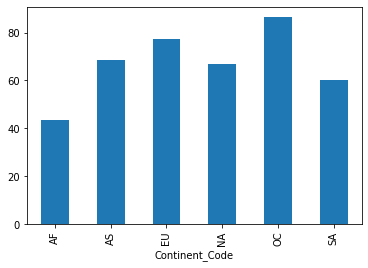

In [156]:
df.groupby(["Continent_Code"])["internet_users_per_100"].mean().plot.bar();

In [157]:
df.groupby(["Continent_Code"])["Math"].mean()

Continent_Code
AF    363.212100
AS    466.216647
EU    477.981449
NA    424.250960
OC    494.559750
SA    402.887700
Name: Math, dtype: float64

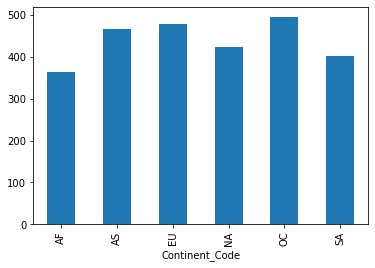

In [158]:
df.groupby(["Continent_Code"])["Math"].mean().plot.bar();

In [159]:
df.groupby(["Continent_Code"])["Reading"].mean()

Continent_Code
AF    355.457400
AS    454.059682
EU    476.164608
NA    446.420920
OC    506.085650
SA    425.359229
Name: Reading, dtype: float64

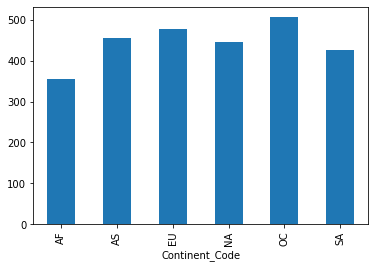

In [160]:
df.groupby(["Continent_Code"])["Reading"].mean().plot.bar();

In [161]:
df.groupby(["Continent_Code"])["Science"].mean()

Continent_Code
AF    381.074250
AS    467.945847
EU    478.299381
NA    438.180760
OC    511.648700
SA    421.747186
Name: Science, dtype: float64

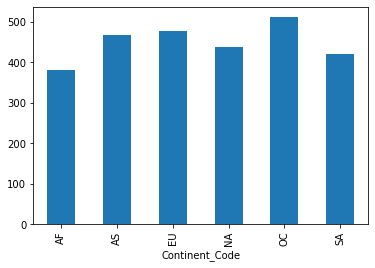

In [162]:
df.groupby(["Continent_Code"])["Science"].mean().plot.bar();

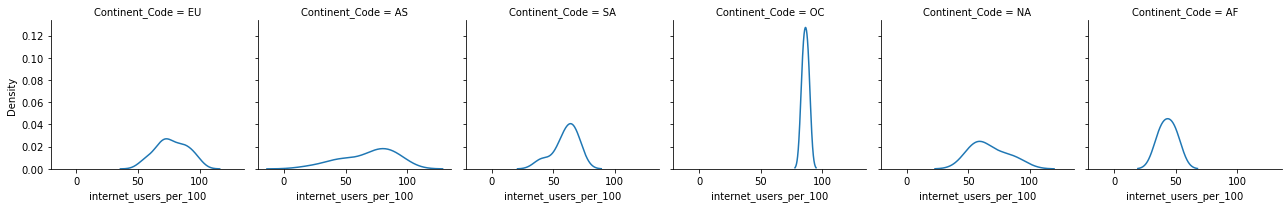

In [163]:
g = sns.FacetGrid(df, col='Continent_Code')
g.map(sns.kdeplot, 'internet_users_per_100');

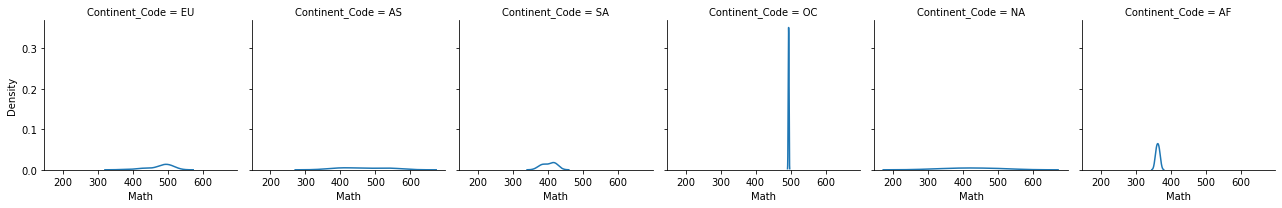

In [164]:
g = sns.FacetGrid(df, col='Continent_Code')
g.map(sns.kdeplot, 'Math');

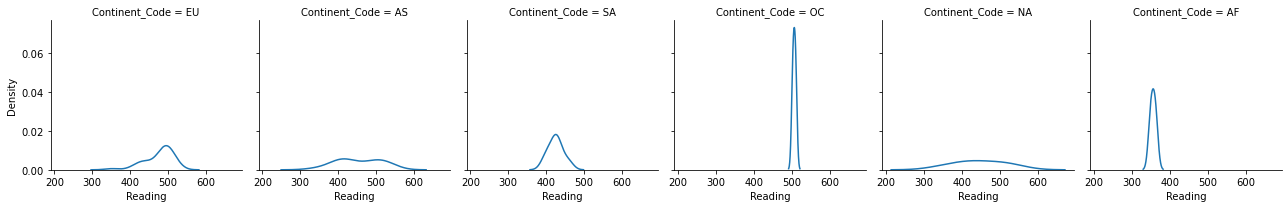

In [165]:
g = sns.FacetGrid(df, col='Continent_Code')
g.map(sns.kdeplot, 'Reading');

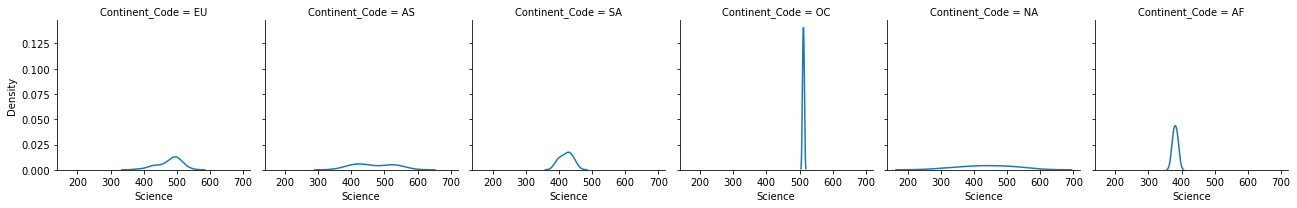

In [166]:
g = sns.FacetGrid(df, col='Continent_Code')
g.map(sns.kdeplot, 'Science');

In [167]:
#H0: AB_Math_Mean = AS_Math_Mean
#H1: AB_Math_Mean != AS_Math_Mean

In [168]:
EU_Math = df[df['Continent_Code'] == "EU"]["Math"]
EU_Math.mean()

477.98144864864867

In [169]:
AS_Math = df[df['Continent_Code'] == "AS"]["Math"]
AS_Math.mean()

466.2166470588236

In [170]:
# equal_var=True because of that "assume normality and equal variances"

In [171]:
indTest = stats.ttest_ind(EU_Math, AS_Math)
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [172]:
# we have high pvalue so that we fail to reject "H0: AB_Math_Mean = AS_Math_Mean" Hypothesis. There isnt any differences.

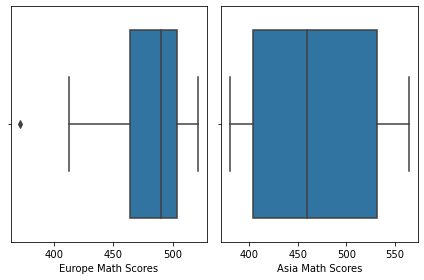

In [173]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x=EU_Math, ax=ax1)
sns.boxplot(x=AS_Math, ax=ax2)
ax1.set_xlabel('Europe Math Scores')
ax2.set_xlabel('Asia Math Scores')
plt.tight_layout();

### EXERCISE 4.

In [174]:
students = pd.read_csv('students_2014.csv')
df = students
df.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
